# Scientific Programming Final Project

**Group E:**

Linnaeus Bundalian, Judith Osuna, David Cabezas, Martin Kusasira Morgan, Sofía González Estrada. 

### Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings

In [2]:
# Import functions from our files
from modules import *

In [3]:
# Load the Excel file into a DataFrame
data_file = 'data/parkinsons_data.csv'
df = pd.read_csv(data_file)

### Rename variables

In [4]:
# Dictionary of names
dict_names = {
    'name':'Name',
    'MDVP:Fo(Hz)': 'MDVP_Fo',
    'MDVP:Fhi(Hz)': 'MDVP_Fhi',
    'MDVP:Flo(Hz)': 'MDVP_Flo',
    'MDVP:Jitter(%)': 'MDVP_Jitter_percent',
    'MDVP:Jitter(Abs)': 'MDVP_Jitter_Abs',
    'MDVP:RAP': 'MDVP_RAP',
    'MDVP:PPQ': 'MDVP_PPQ',
    'Jitter:DDP': 'Jitter_DDP',
    'MDVP:Shimmer': 'MDVP_Shim',
    'MDVP:Shimmer(dB)': 'MDVP_Shim_dB',
    'Shimmer:APQ3': 'Shimmer_APQ3',
    'Shimmer:APQ5': 'Shimmer_APQ5',
    'MDVP:APQ': 'MDVP_APQ',
    'Shimmer:DDA': 'Shimmer_DDA',
    'NHR': 'NHR',
    'HNR': 'HNR',
    'status': 'Status',
    'RPDE': 'RPDE',
    'DFA': 'DFA',
    'spread1': 'Spread1',
    'spread2': 'Spread2',
    'D2': 'D2',
    'PPE': 'PPE'
}

# Apply the function to rename the columns
renamed_df = rename_variables(df, dict_names)

# View the result
print(renamed_df.columns)

Index(['Name', 'MDVP_Fo', 'MDVP_Fhi', 'MDVP_Flo', 'MDVP_Jitter_percent',
       'MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shim',
       'MDVP_Shim_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ',
       'Shimmer_DDA', 'NHR', 'HNR', 'Status', 'RPDE', 'DFA', 'Spread1',
       'Spread2', 'D2', 'PPE'],
      dtype='object')


### Detect null values

In [5]:
count_nulls(renamed_df)


Number of null values in the dataset:
 Name                   0
MDVP_Fo                0
MDVP_Fhi               0
MDVP_Flo               0
MDVP_Jitter_percent    0
MDVP_Jitter_Abs        0
MDVP_RAP               0
MDVP_PPQ               0
Jitter_DDP             0
MDVP_Shim              0
MDVP_Shim_dB           0
Shimmer_APQ3           0
Shimmer_APQ5           0
MDVP_APQ               0
Shimmer_DDA            0
NHR                    0
HNR                    0
Status                 0
RPDE                   0
DFA                    0
Spread1                0
Spread2                0
D2                     0
PPE                    0
dtype: int64


### Handle outliers

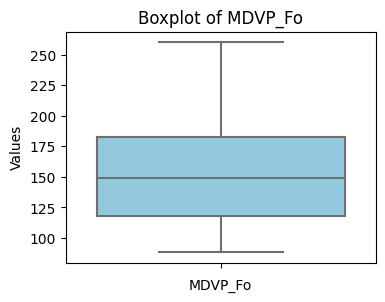

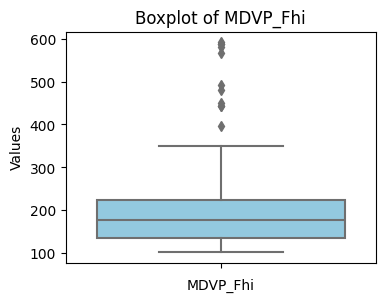

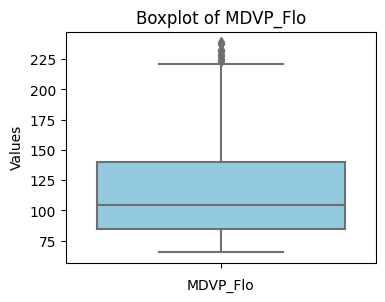

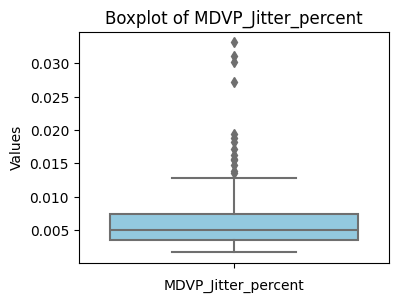

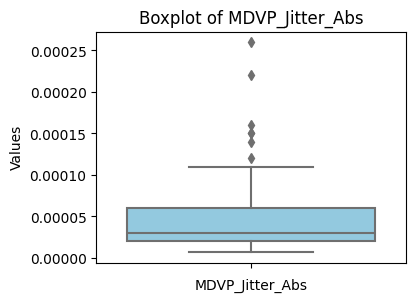

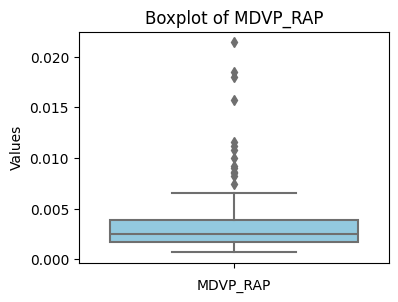

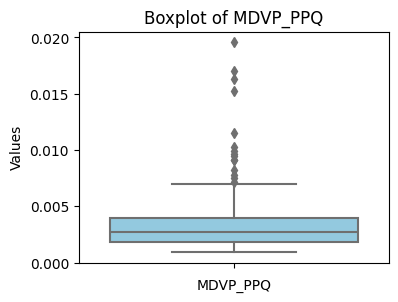

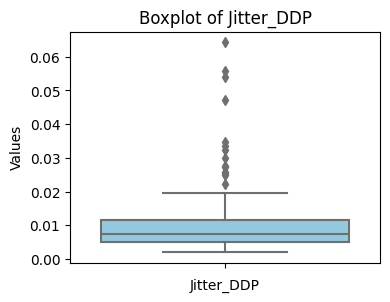

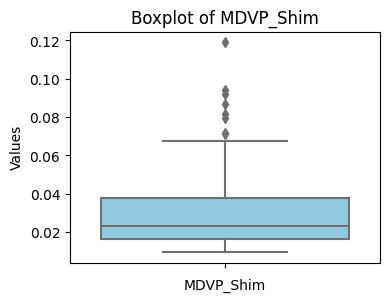

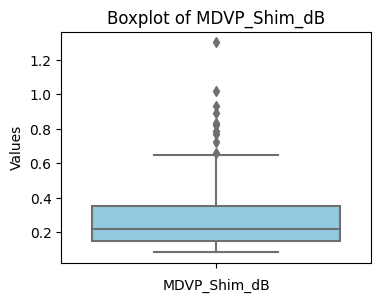

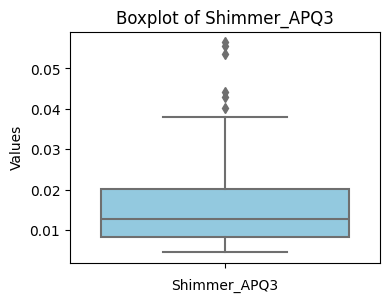

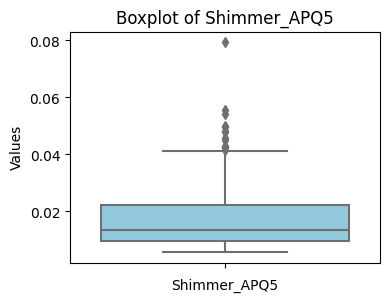

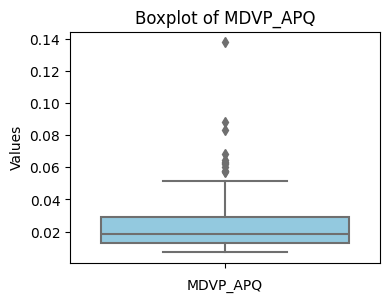

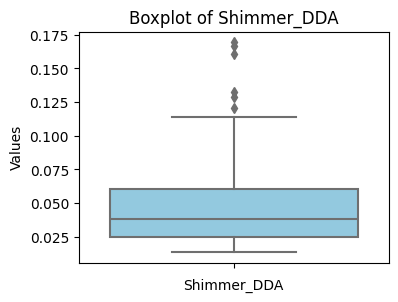

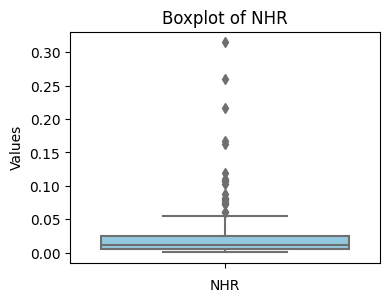

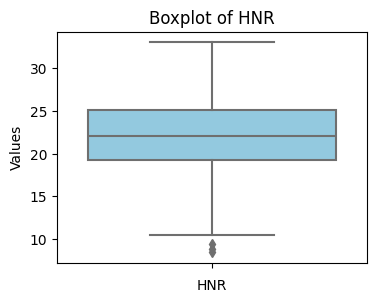

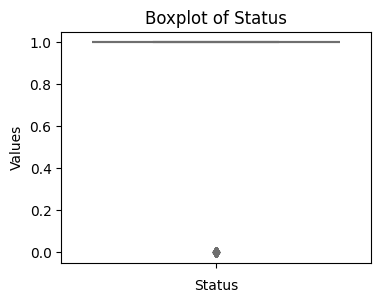

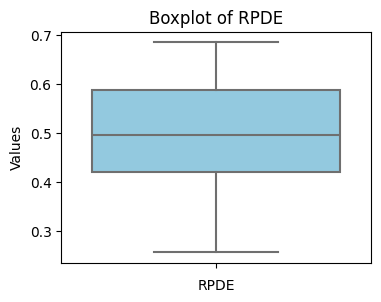

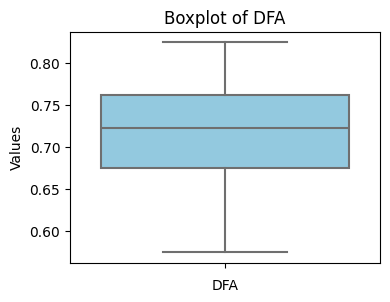

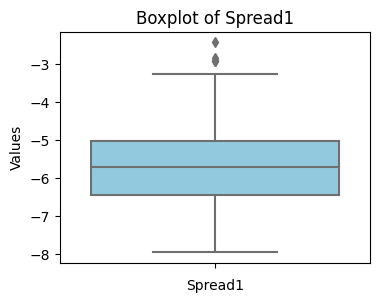

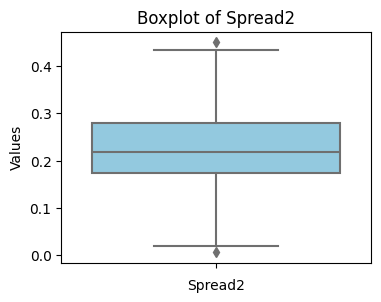

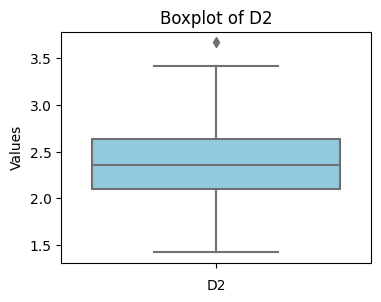

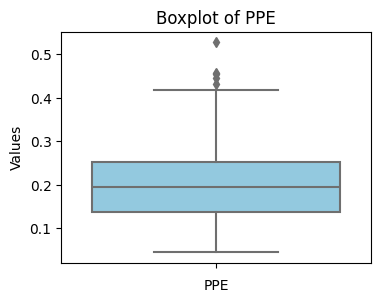

In [6]:
# Visualize outliers
generate_boxplots(renamed_df, None)

In [7]:
# Handle outliers
df_no_outliers = handle_outliers(renamed_df)


Number of outliers handled per column:
MDVP_Fo: 0
MDVP_Fhi: 11
MDVP_Flo: 9
MDVP_Jitter_percent: 14
MDVP_Jitter_Abs: 7
MDVP_RAP: 14
MDVP_PPQ: 15
Jitter_DDP: 14
MDVP_Shim: 8
MDVP_Shim_dB: 10
Shimmer_APQ3: 6
Shimmer_APQ5: 13
MDVP_APQ: 12
Shimmer_DDA: 6
NHR: 19
HNR: 3
RPDE: 0
DFA: 0
Spread1: 4
Spread2: 2
D2: 1
PPE: 5


C:\Users\sofig\anaconda3\envs\SP_project_env\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\sofig\anaconda3\envs\SP_project_env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sofig\anaconda3\envs\SP_project_env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [8]:
df_no_outliers.head()

,Name,MDVP_Fo,MDVP_Fhi,MDVP_Flo,MDVP_Jitter_percent,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shim,...,Shimmer_DDA,NHR,HNR,Status,RPDE,DFA,Spread1,Spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00706,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00775,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Handle correlation between variables

In [9]:
df_no_corr, corr_vbles = drop_correlated_vbles(df_no_outliers, 0.75)

In [10]:
# This is the new Data Frame, with no correlated variables
df_no_corr.head()

,Name,MDVP_Fo,MDVP_Flo,MDVP_Jitter_percent,MDVP_Shim,NHR,Status,RPDE,DFA,Spread2,D2
0,phon_R01_S01_1,119.992,74.997,0.00784,0.04374,0.02211,1,0.414783,0.815285,0.266482,2.301442
1,phon_R01_S01_2,122.400,113.819,0.00968,0.06134,0.01929,1,0.458359,0.819521,0.335590,2.486855
2,phon_R01_S01_3,116.682,111.555,0.01050,0.05233,0.01309,1,0.429895,0.825288,0.311173,2.342259
3,phon_R01_S01_4,116.676,111.366,0.00997,0.05492,0.01353,1,0.434969,0.819235,0.334147,2.405554
4,phon_R01_S01_5,116.014,110.655,0.01284,0.06425,0.01767,1,0.417356,0.823484,0.234513,2.332180


In [11]:
# This are the correlated variables that were removed
corr_vbles

['MDVP_Fhi',
 'MDVP_Jitter_Abs',
 'MDVP_RAP',
 'MDVP_PPQ',
 'Jitter_DDP',
 'MDVP_Shim_dB',
 'Shimmer_APQ3',
 'Shimmer_APQ5',
 'MDVP_APQ',
 'Shimmer_DDA',
 'HNR',
 'Spread1',
 'PPE']

### Use scatter plots to confirm the removal of correlated variables

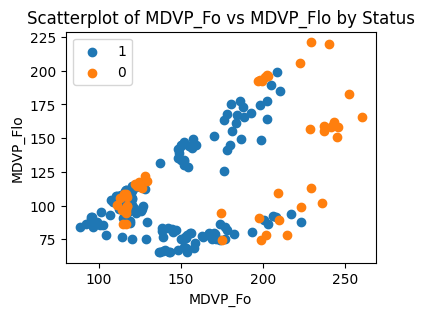

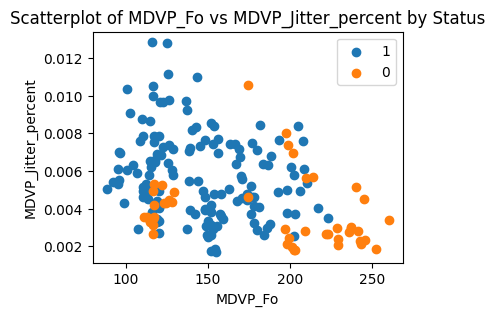

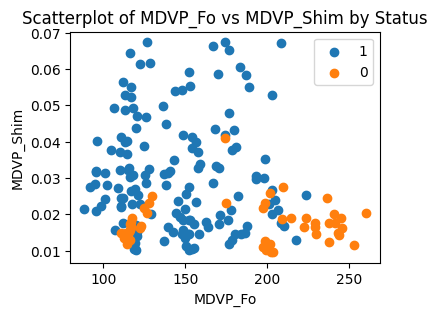

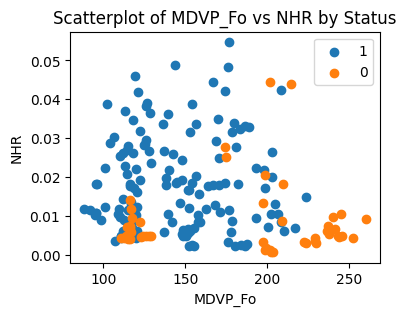

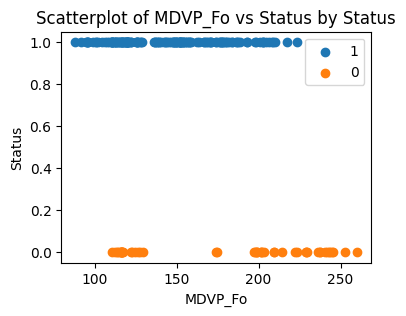

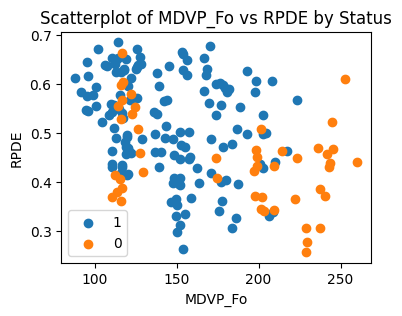

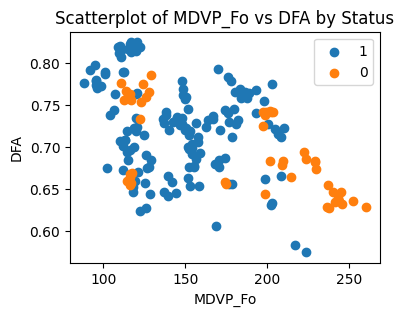

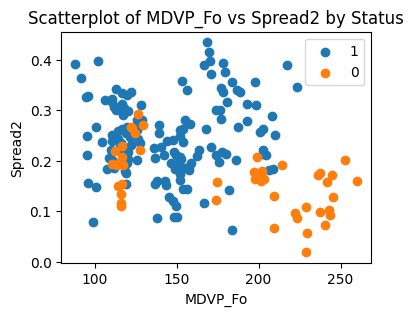

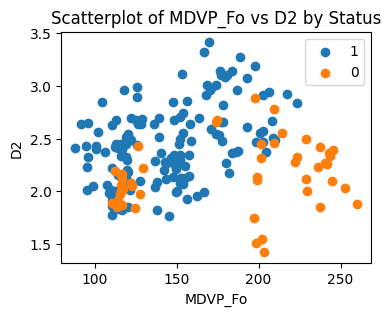

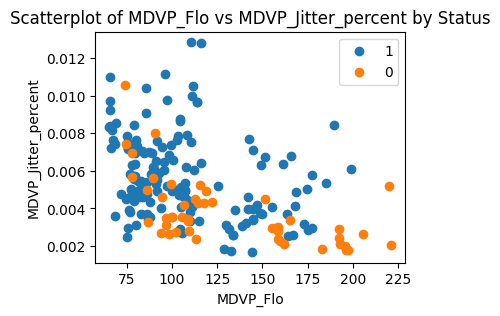

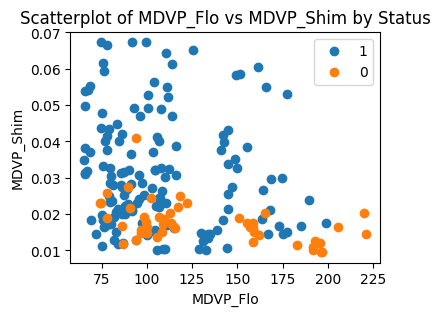

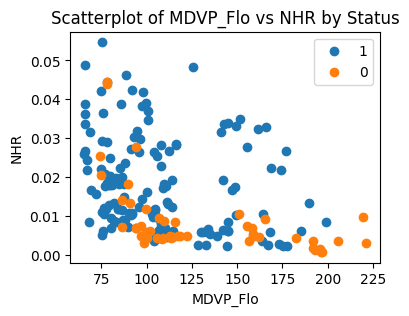

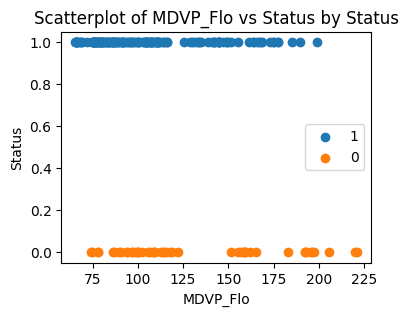

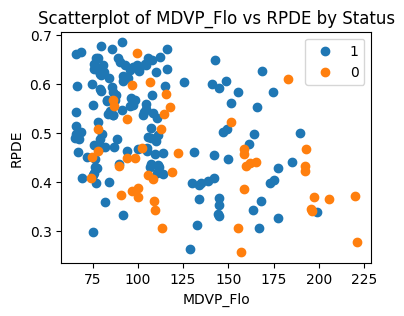

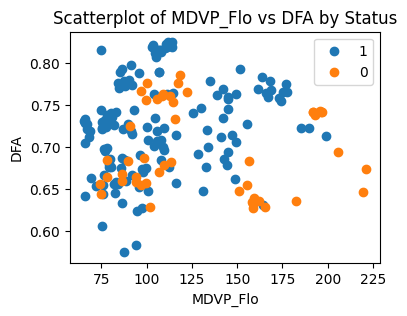

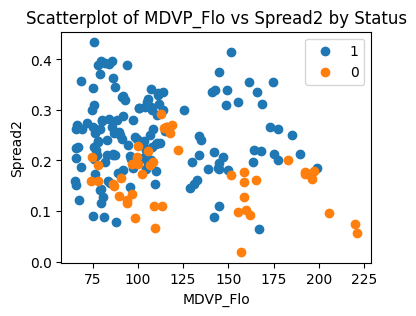

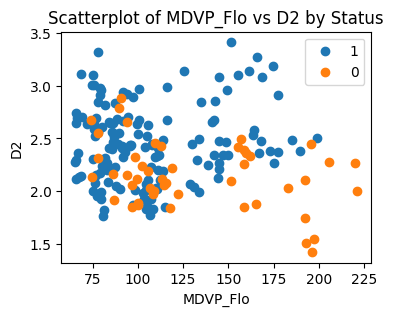

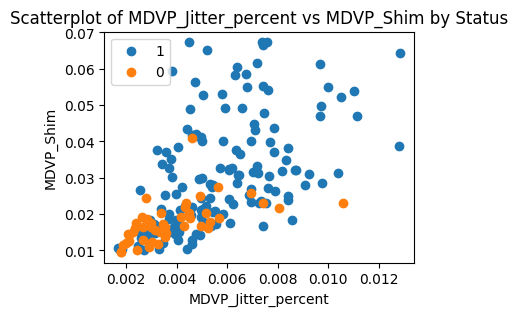

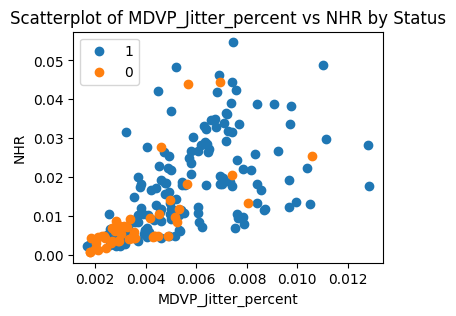

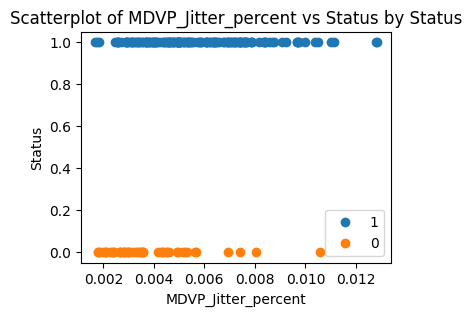

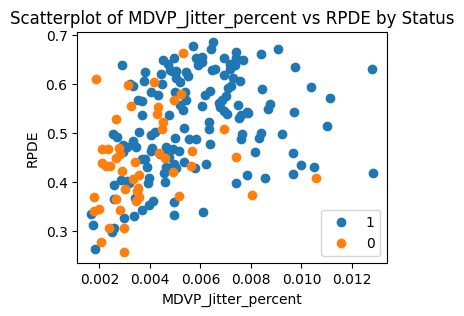

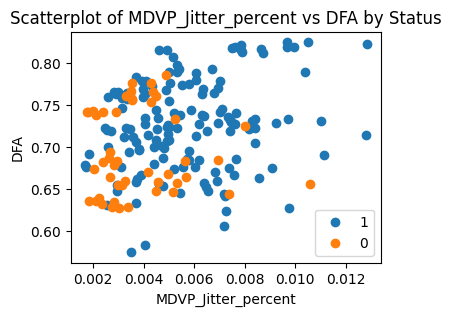

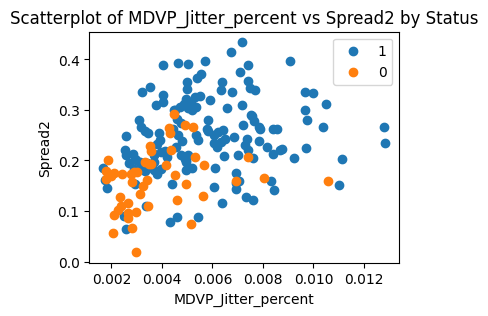

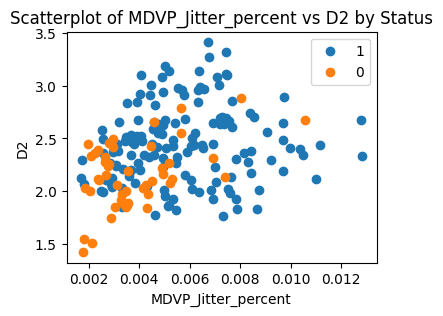

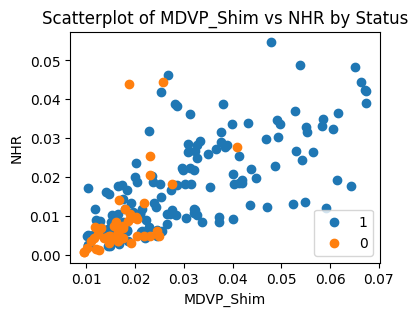

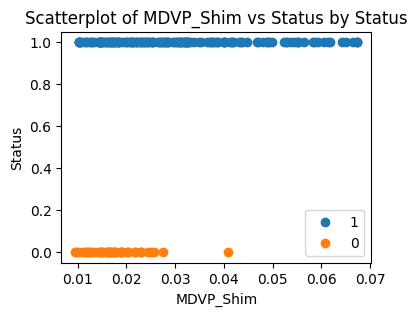

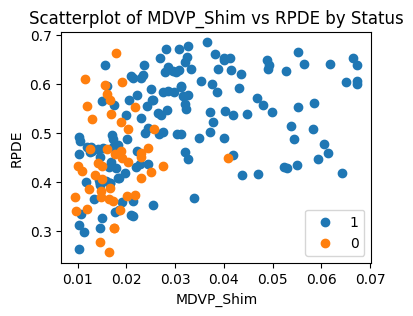

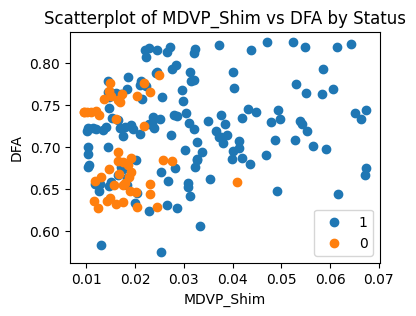

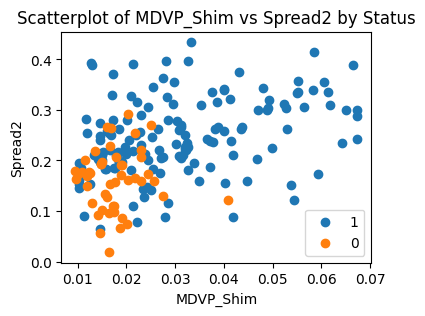

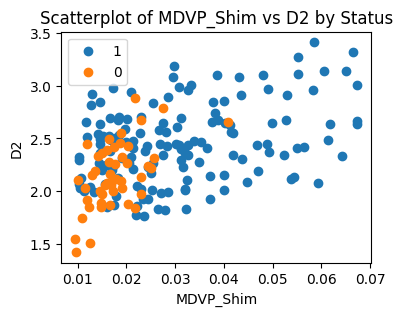

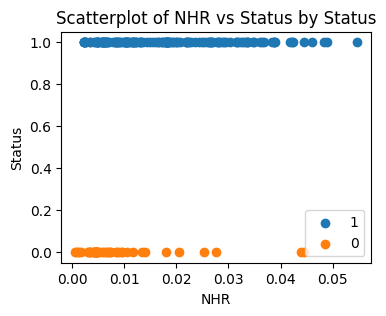

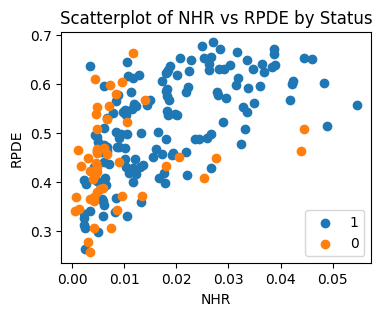

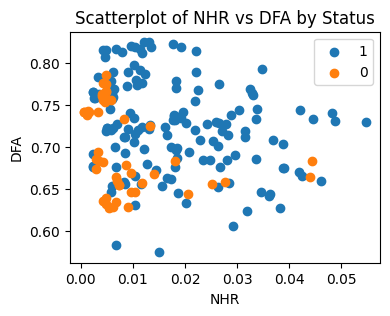

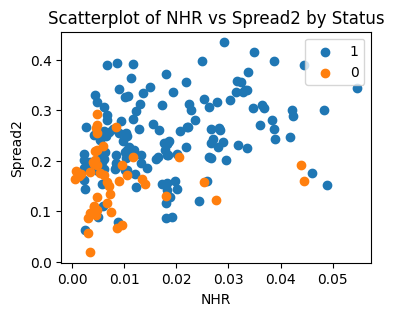

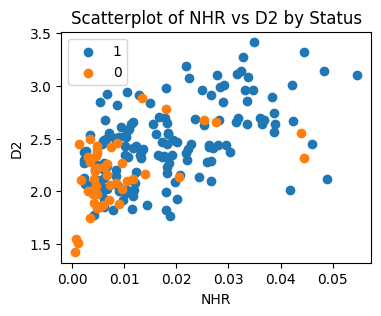

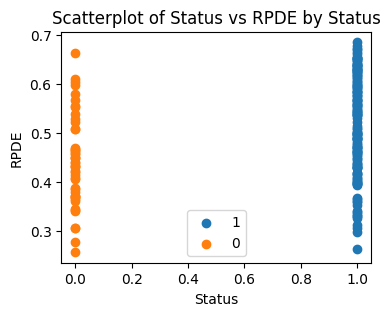

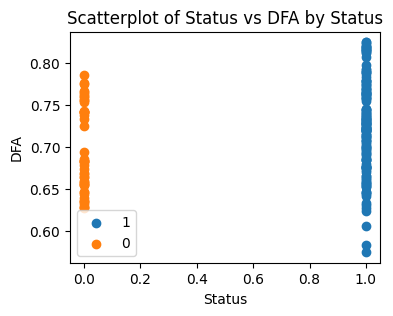

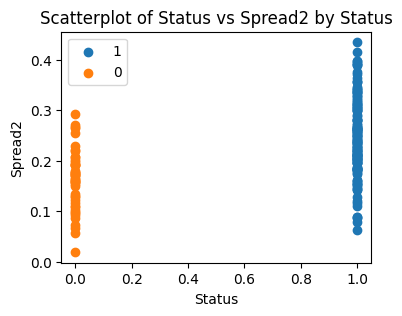

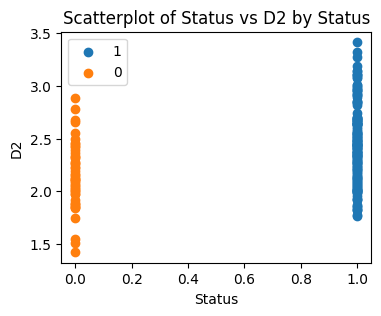

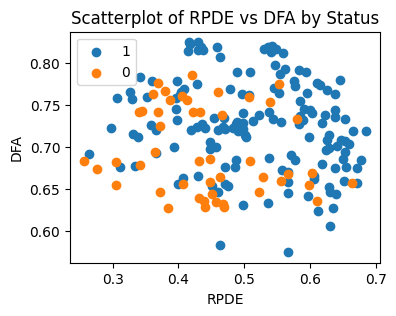

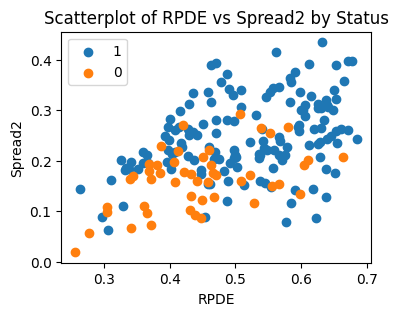

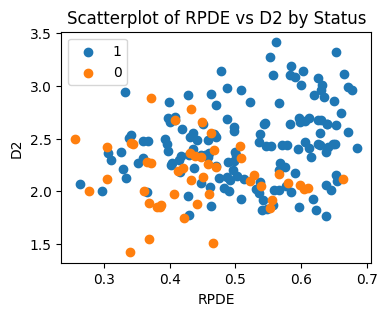

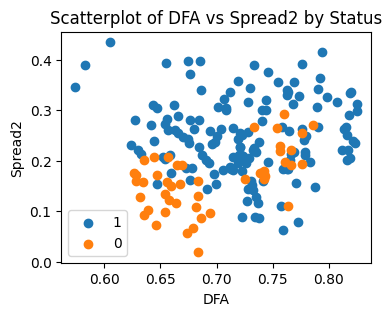

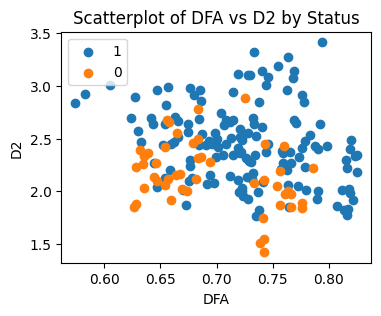

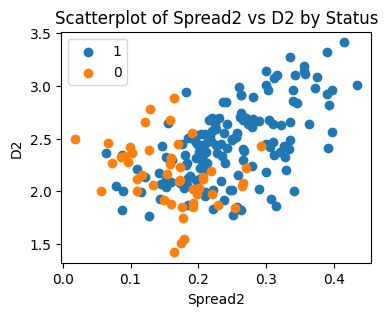

In [12]:
# Define grouping variable
group_column = "Status"

# Select numeric columns
numeric_columns = df_no_corr.select_dtypes(include=['number']).columns

# Plot variables using the scatter_plot function
for i, var1 in enumerate(numeric_columns):
    for j, var2 in enumerate(numeric_columns):
        if i < j:  # Avoid duplicate pairs and self-pairs
            scatter_plot(df_no_corr, var1, var2, group_column)

### Analyze data summaries

In [13]:
# Show the summary of the data before and after
print("\nData summary before (original):\n")
print(renamed_df.describe())
print("\nData summary clean (no outliers or correlated variables):\n")
print(df_no_corr.describe())


Data summary before (original):

          MDVP_Fo    MDVP_Fhi    MDVP_Flo  MDVP_Jitter_percent  \
count  195.000000  195.000000  195.000000           195.000000   
mean   154.228641  197.104918  116.324631             0.006220   
std     41.390065   91.491548   43.521413             0.004848   
min     88.333000  102.145000   65.476000             0.001680   
25%    117.572000  134.862500   84.291000             0.003460   
50%    148.790000  175.829000  104.315000             0.004940   
75%    182.769000  224.205500  140.018500             0.007365   
max    260.105000  592.030000  239.170000             0.033160   

       MDVP_Jitter_Abs    MDVP_RAP    MDVP_PPQ  Jitter_DDP   MDVP_Shim  \
count       195.000000  195.000000  195.000000  195.000000  195.000000   
mean          0.000044    0.003306    0.003446    0.009920    0.029709   
std           0.000035    0.002968    0.002759    0.008903    0.018857   
min           0.000007    0.000680    0.000920    0.002040    0.009540   
2

### Group by subject

In [14]:
grouped_df = group_and_average(df_no_corr)

Number of rows in the new df: 32
Number of unique subjects in the new df: 32


In [15]:
grouped_df.head()

,Subject_ID,MDVP_Fo,MDVP_Flo,MDVP_Jitter_percent,MDVP_Shim,NHR,Status,RPDE,DFA,Spread2,D2
0,S01,118.719333,106.029833,0.010085,0.053932,0.016318,1.0,0.428488,0.821314,0.296836,2.342642
1,S02,99.770333,95.413167,0.004585,0.021668,0.008917,1.0,0.598429,0.778017,0.308289,2.287428
2,S04,147.346167,87.532333,0.004347,0.019343,0.013080,1.0,0.521660,0.645843,0.249288,2.360638
3,S05,159.837667,86.767167,0.006247,0.043337,0.025608,1.0,0.626723,0.695886,0.278483,2.787869
4,S06,150.644667,78.278333,0.005230,0.021367,0.014892,1.0,0.432724,0.719675,0.228296,2.440360


### Analyze variables between controls and patients

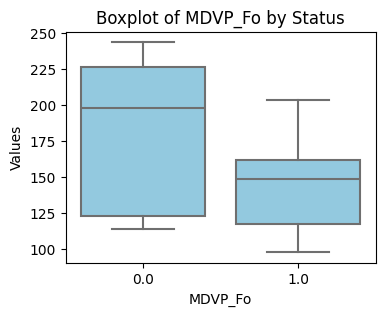

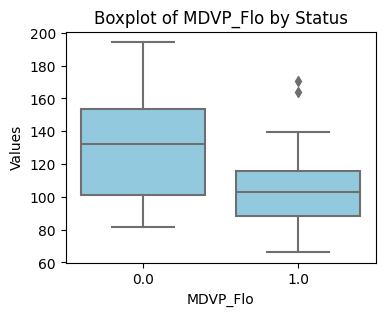

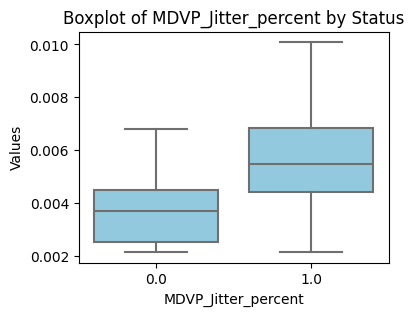

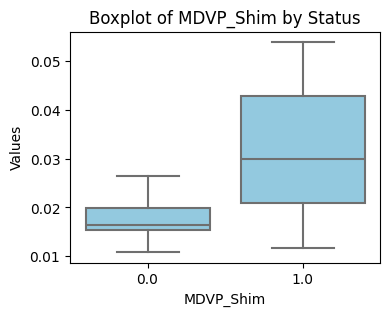

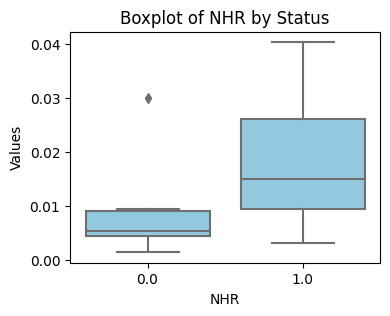

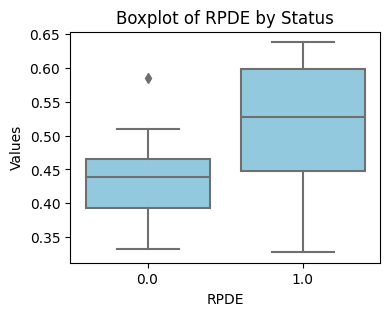

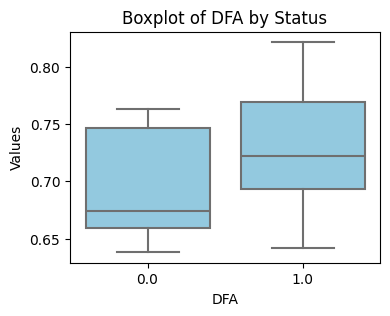

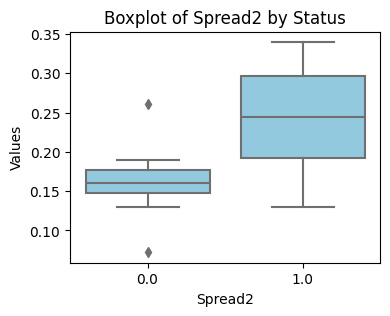

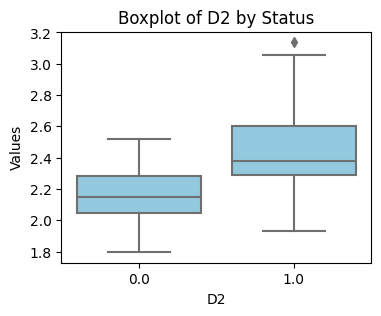

In [16]:
# Visualize the difference in the behavior of variables between patients and controls
generate_boxplots(grouped_df, 'Status')

### Normalize data

In [17]:
# Apply the normalization function
normalized_df = normalize_dataframe(grouped_df, method='z-score', exclude_columns=['Subject_ID', 'Status'])

In [18]:
normalized_df.head()

,Subject_ID,MDVP_Fo,MDVP_Flo,MDVP_Jitter_percent,MDVP_Shim,NHR,Status,RPDE,DFA,Spread2,D2
0,S01,-0.871842,-0.224648,2.422357,2.081330,0.063194,1.0,-0.738285,1.953532,1.090130,-0.087239
1,S02,-1.341992,-0.573270,-0.339092,-0.467315,-0.622940,1.0,1.064727,1.134122,1.263135,-0.268054
2,S04,-0.161571,-0.832054,-0.458755,-0.650978,-0.236999,1.0,0.250237,-1.367303,0.371913,-0.028304
3,S05,0.148360,-0.857180,0.495200,1.244377,0.924376,1.0,1.364914,-0.420238,0.812897,1.370811
4,S06,-0.079731,-1.135929,-0.015249,-0.491145,-0.069058,1.0,-0.693344,0.029986,0.054825,0.232772


### Get data for a KNN classifier

##### For the model with normalized data

In [19]:
# Divide the data into the appropiate X and y for training and testing
X_train_n, X_test_n, y_train_n, y_test_n = get_knn_data(normalized_df)

In [20]:
# Resample subsets to achieve a more balanced result
X_train_n_resamp, y_train_n_resamp = resample(X_train_n, y_train_n)

Original train class distribution: Counter({1.0: 16, 0.0: 6})
Resampled train class distribution: Counter({1.0: 16, 0.0: 16})


##### For the model with non-normalized data

In [21]:
# Divide the data into the appropiate X and y for training and testing
X_train, X_test, y_train, y_test = get_knn_data(grouped_df)

In [22]:
# Resample subsets to achieve a more balanced result
X_train_resamp, y_train_resamp = resample(X_train, y_train)

Original train class distribution: Counter({1.0: 16, 0.0: 6})
Resampled train class distribution: Counter({1.0: 16, 0.0: 16})


### Find the best value of n

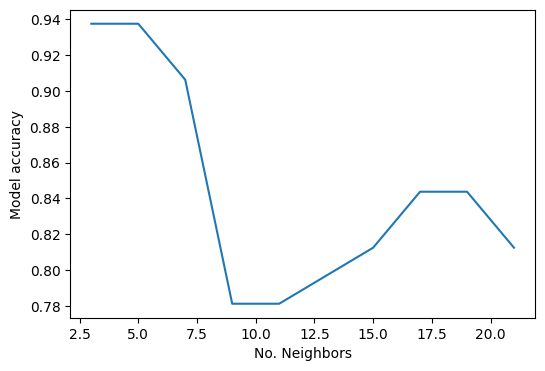

In [23]:
# Create a list with possible n values (neighbors)
n_values = list([3, 5, 7, 9, 11, 15, 17, 19, 21])

# Apply the function to graph the accuracy against different values of n
find_best_n(n_values, X_train_n_resamp, y_train_n_resamp)

# The same n was taken for both models

### Create a KNN classifier

In [34]:
# Choose a n = 5, since it's the highest accuracy that stabilizes for a series of n values
n = 5

##### Model with normalized data

In [35]:
# Create an instance of the ParkinsonsClassifier class
classifier_n = ParkinsonsClassifier()

# Train model
knn_model_n = classifier_n.train(X=X_train_n_resamp, y=y_train_n_resamp, k=n)

In [36]:
classifier_n.save_model("model_normalized.pkl")

##### Model with non-normalized data

In [37]:
# Create an instance of the ParkinsonsClassifier class
classifier = ParkinsonsClassifier()

# Train model
knn_model = classifier.train(X=X_train_resamp, y=y_train_resamp, k=n)

In [38]:
classifier.save_model("model_non-normalized.pkl")

### Predict the status of a subject using the model

##### Model with normalized data

In [27]:
predictions_n = classifier_n.predict(X_test_n)
predictions_n

[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

##### Model with non-normalized data

In [28]:
predictions = classifier.predict(X_test)
predictions

[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

### Validate the KNN classifier

##### Model with normalized data

In [29]:
# Check the performance of the current model
validator_n = CrossValidator(knn_model_n, cv=5)

In [30]:
performance_metrics_n = validator_n.calculate_performance(predictions_n, y_test_n)
print(performance_metrics_n)

Accuracy: 0.6000
Confusion Matrix:
[[0 2]
 [2 6]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.75      0.75      0.75         8

    accuracy                           0.60        10
   macro avg       0.38      0.38      0.38        10
weighted avg       0.60      0.60      0.60        10

{'accuracy': 0.6, 'confusion_matrix': array([[0, 2],
       [2, 6]], dtype=int64), 'classification_report': {'0.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1.0': {'precision': 0.75, 'recall': 0.75, 'f1-score': 0.75, 'support': 8}, 'accuracy': 0.6, 'macro avg': {'precision': 0.375, 'recall': 0.375, 'f1-score': 0.375, 'support': 10}, 'weighted avg': {'precision': 0.6, 'recall': 0.6, 'f1-score': 0.6, 'support': 10}}}


In [31]:
validation_metrics_n = validator_n.validate(X_test_n, y_test_n)

C:\Users\sofig\anaconda3\envs\SP_project_env\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


TypeError: Cannot clone object 'None' (type <class 'NoneType'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [34]:
def plot_confusion_matrix(conf_matrix):

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
plot_confusion_matrix(performance_metrics['confusion_matrix'])

In [ ]:
plot_confusion_matrix(validation_metrics['confusion_matrix'])

##### Model with non-normalized data

In [32]:
# Check the performance of the current model
validator = CrossValidator(knn_model, cv=5)
performance_metrics = validator.calculate_performance(predictions,y_test)
print(performance_metrics)

Accuracy: 0.7000
Confusion Matrix:
[[0 2]
 [1 7]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.78      0.88      0.82         8

    accuracy                           0.70        10
   macro avg       0.39      0.44      0.41        10
weighted avg       0.62      0.70      0.66        10

{'accuracy': 0.7, 'confusion_matrix': array([[0, 2],
       [1, 7]], dtype=int64), 'classification_report': {'0.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, '1.0': {'precision': 0.7777777777777778, 'recall': 0.875, 'f1-score': 0.823529411764706, 'support': 8}, 'accuracy': 0.7, 'macro avg': {'precision': 0.3888888888888889, 'recall': 0.4375, 'f1-score': 0.411764705882353, 'support': 10}, 'weighted avg': {'precision': 0.6222222222222222, 'recall': 0.7, 'f1-score': 0.6588235294117648, 'support': 10}}}


In [33]:
validation_metrics = validator.validate(X_test,y_test)

C:\Users\sofig\anaconda3\envs\SP_project_env\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


TypeError: Cannot clone object 'None' (type <class 'NoneType'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
def plot_confusion_matrix(conf_matrix):

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
plot_confusion_matrix(performance_metrics['confusion_matrix'])

In [ ]:
plot_confusion_matrix(validation_metrics['confusion_matrix'])

In [41]:
classifier.save_model("model.pkl")